In [1]:
import pycaret
print(pycaret.__version__)  # 2.3.10 나오면 성공
from pycaret.regression import *


2.3.10


In [2]:
# --- Notebook Theme (codes from @vivek468) ---
from IPython.core.display import display, HTML, Javascript

color_map = ['#568203', '#719C27']

prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = '''
div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s;
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s;
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s;
    border-top: 2px solid %s;
}

div.input_prompt {
color: %s;
}

div.output_prompt {
color: %s; 
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s;
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s;
}

.edit_mode div.cell.selected:before {
background: %s;
}

.edit_mode div.cell.selected {
border-color: %s;

}
'''

def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

In [3]:
# --- Installing Libraries ---
!pip install pycaret
!pip install markupsafe==2.0.1
!pip jinja2

DEPRECATION: pytorch-lightning 1.5.10 has a non-standard dependency specifier torch>=1.7.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pytorch-lightning 1.5.10 has a non-standard dependency specifier torch>=1.7.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: unknown command "jinja2"


In [4]:
# --- Importing Libraries ---
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pycaret
import warnings
import jinja2

from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import *
from pycaret.regression import *

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

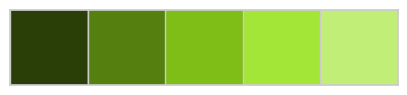

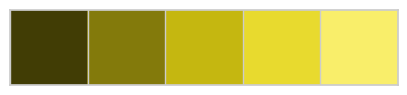

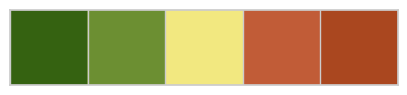

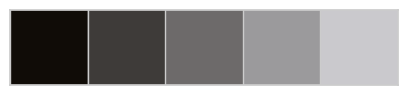

In [5]:
# --- Create List of Color Palletes ---
olive_grad = ['#2A3F07', '#557F0F', '#7FBE17', '#A4E637', '#C1EE76']
yellow_grad = ['#413D05', '#837A0B', '#C5B710', '#E8DA2E', '#F9EE6A']
color_mix = ['#356211', '#6C8F32', '#F2E880', '#C15C37', '#AA471F']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(olive_grad)
sns.palplot(yellow_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

In [6]:
# --- Reading Dataset ---
ds = pd.read_csv('../input/avocado-prices/avocado.csv')
ds.head().style.background_gradient(cmap='Greens').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.330000,64236.620000,1036.740000,54454.850000,48.160000,8696.870000,8603.620000,93.250000,0.000000,conventional,2015,Albany
1,2015-12-20,1.350000,54876.980000,674.280000,44638.810000,58.330000,9505.560000,9408.070000,97.490000,0.000000,conventional,2015,Albany
2,2015-12-13,0.930000,118220.220000,794.700000,109149.670000,130.500000,8145.350000,8042.210000,103.140000,0.000000,conventional,2015,Albany
3,2015-12-06,1.080000,78992.150000,1132.000000,71976.410000,72.580000,5811.160000,5677.400000,133.760000,0.000000,conventional,2015,Albany
4,2015-11-29,1.280000,51039.600000,941.480000,43838.390000,75.780000,6183.950000,5986.260000,197.690000,0.000000,conventional,2015,Albany


In [7]:
# --- Print Dataset Info ---
print('\033[92m\033[1m'+'.: Imported Dataset Info :.'+'\033[0m')
print('\033[92m*' * 30+'\033[0m')
print('Total Rows:'+'\033[92m\033[1m', ds.shape[0])
print('\033[0m'+'Total Columns:'+'\033[92m\033[1m', ds.shape[1])
print('\033[0m\033[92m'+'*' * 30+'\033[0m')
print('\n')

# --- Print Dataset Detail ---
print('\033[92m\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('\033[0m\033[92m'+'*' * 30+'\033[0m')
ds.info(memory_usage = False)

.: Imported Dataset Info :.
******************************
Total Rows: 18249
Total Columns: 14
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), in

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 It can be seen that dataset has successfully imported.<br>
    👉 In the dataset, there are <mark><b>14 columns</b></mark> with <mark><b>18249 observations</b></mark>.<br>
    👉 Also, there are <mark><b>no null values</b></mark> in this dataset.<br>
    👉 The <b>details of each variables</b> also can be seen above.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

****************************************
.: Total Avocado based on each Type :.
****************************************


conventional    9126
organic         9123
Name: type, dtype: int64

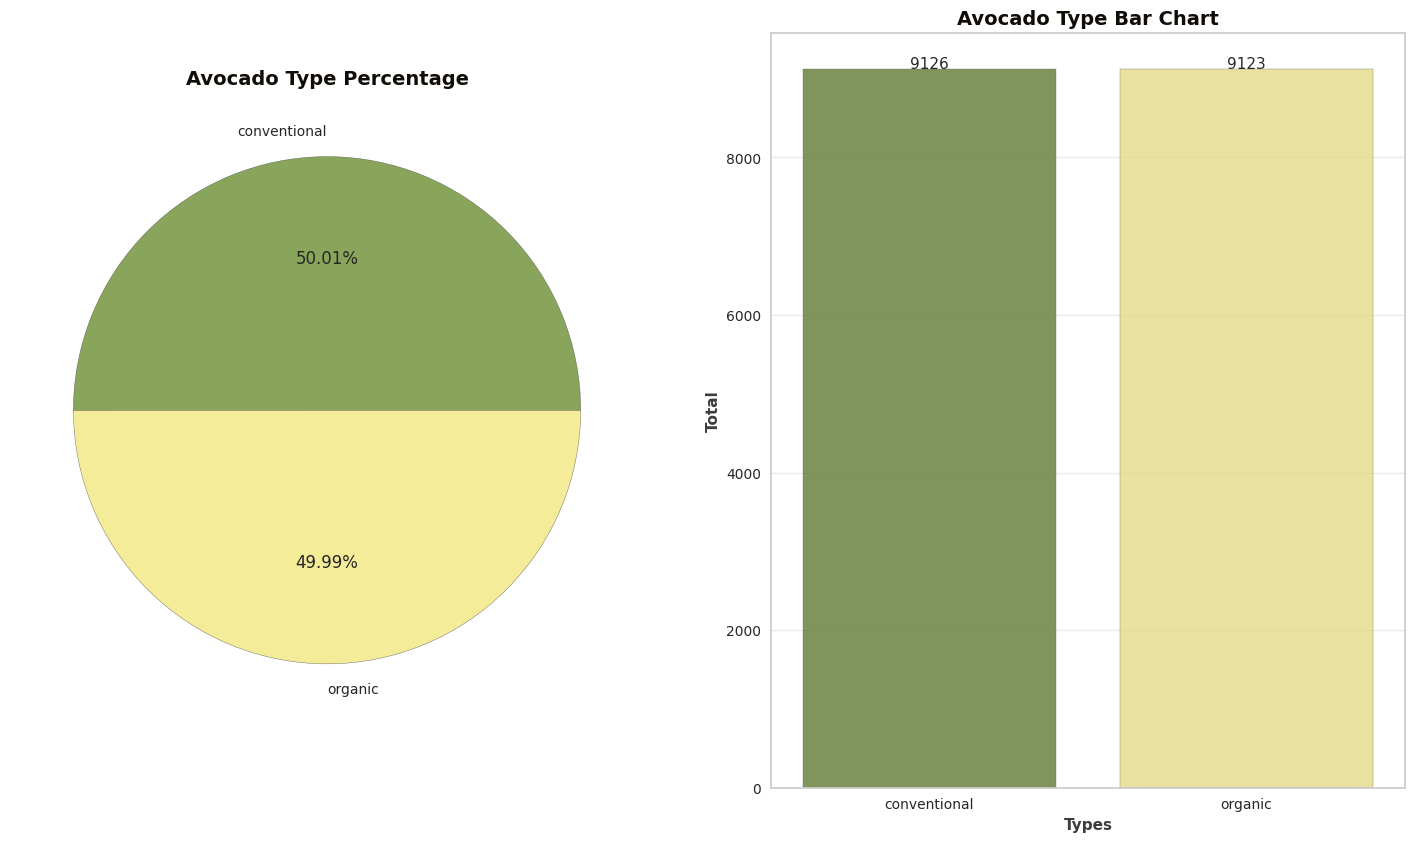

In [8]:
# --- Colors and Labels (Null Values Dropped) ---
colors = color_mix[1:3]
labels = ds['type'].dropna().unique()
order = ds['type'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(18, 10))

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Avocado Type Percentage', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', 
          color = black_grad[0])
plt.pie(ds['type'].value_counts(), labels = order, colors = colors, 
        wedgeprops = dict(alpha = 0.8, edgecolor = black_grad[1]), autopct = '%.2f%%')

# --- Bar Chart ---
countplt = plt.subplot(1, 2, 2)
plt.title('Avocado Type Bar Chart', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
ax = sns.countplot(x = 'type', data = ds, palette = colors, order = order, edgecolor = black_grad[2], alpha = 0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+0.75,rect.get_height(), horizontalalignment = 'center', 
             fontsize = 11)

plt.xlabel('Types', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Total', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('\033[92m'+'*' * 40)
print('\033[92m\033[1m'+'.: Total Avocado based on each Type :.'+'\033[0m')
print('\033[92m'+'*' * 40+'\033[0m')
ds.type.value_counts(dropna=False)

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The distribution of conventional and organic avocados are <mark><b>equally distributed</b></mark>.
    </div>

***********************************
.: Total Avocado based on Year :.
***********************************


2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

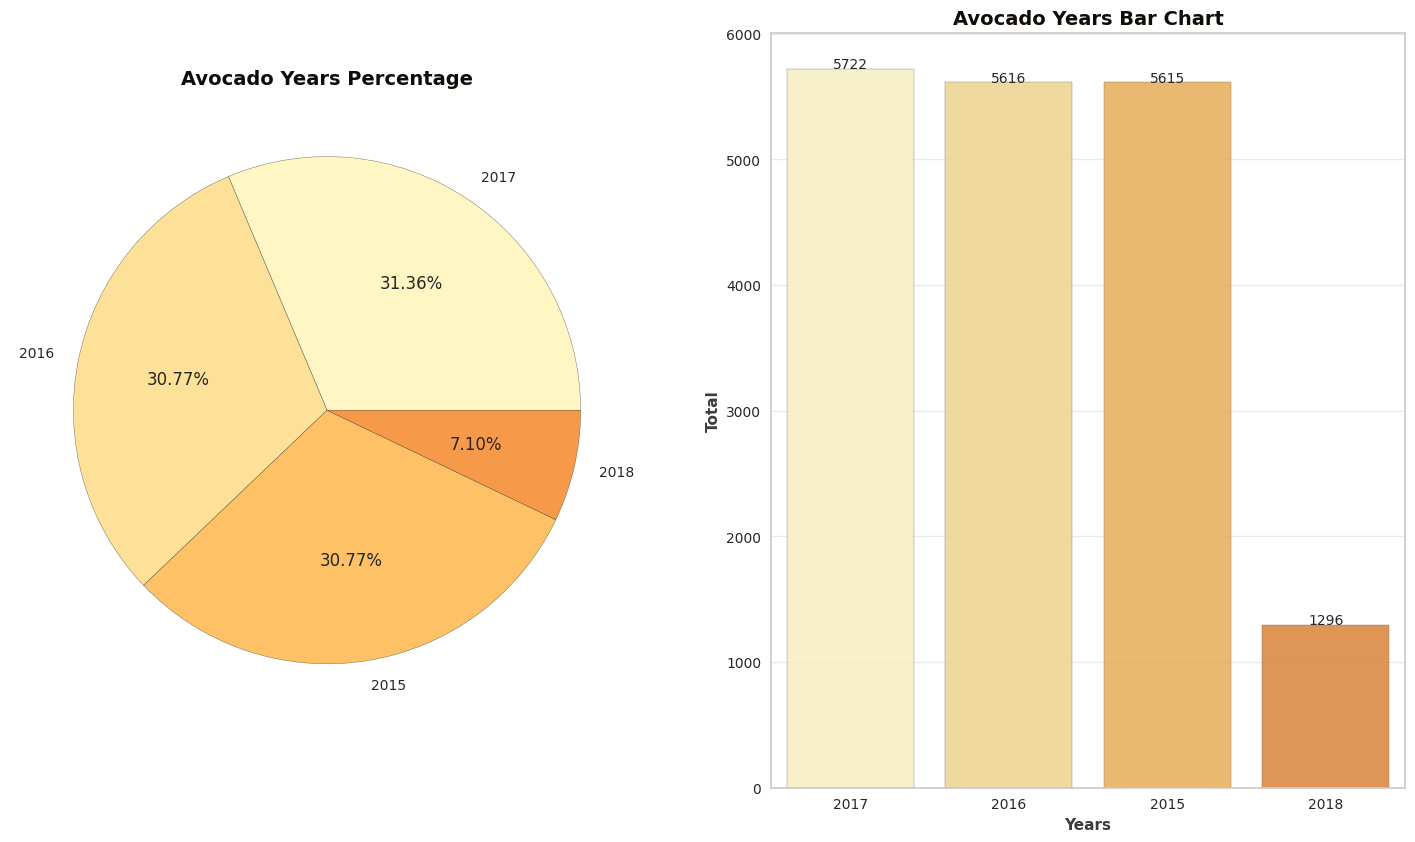

In [9]:
# --- Colors and Labels (Null Values Dropped) ---
colors = sns.color_palette('YlOrBr')
labels = ds['year'].dropna().unique()
order = ds['year'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(18,10))

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Avocado Years Percentage', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
plt.pie(ds['year'].value_counts(), labels = order, colors = colors, 
        wedgeprops = dict(alpha = 0.8, edgecolor = black_grad[1]), autopct = '%.2f%%')

# --- Bar Chart ---
countplt = plt.subplot(1,2,2)
plt.title('Avocado Years Bar Chart', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
ax = sns.countplot(x = 'year', data = ds, palette = colors, order = order, edgecolor = black_grad[2], alpha = 0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+0.75,rect.get_height(), horizontalalignment = 'center',
             fontsize = 10)

plt.xlabel('Years', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Total', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('\033[92m'+'*' * 35)
print('\033[92m\033[1m'+'.: Total Avocado based on Year :.'+'\033[0m')
print('\033[92m'+'*' * 35+'\033[0m')
ds.year.value_counts(dropna=False)

In [10]:
# --- Count Categorical Labels w/Out Dropping Null Walues ---
print('\033[92m'+'*' * 38)
print('\033[92m\033[1m'+'.: Total Avocado based on Regions :.'+'\033[0m')
print('\033[92m'+'*' * 38)
ds.region.value_counts(dropna=False)

**************************************
.: Total Avocado based on Regions :.
**************************************


Plains                 338
Sacramento             338
BaltimoreWashington    338
California             338
NorthernNewEngland     338
Spokane                338
Indianapolis           338
Roanoke                338
Louisville             338
Orlando                338
Detroit                338
Jacksonville           338
Southeast              338
LosAngeles             338
HartfordSpringfield    338
HarrisburgScranton     338
DallasFtWorth          338
NewYork                338
Charlotte              338
Nashville              338
MiamiFtLauderdale      338
Syracuse               338
SouthCarolina          338
Seattle                338
West                   338
Columbus               338
Chicago                338
Atlanta                338
Boston                 338
Albany                 338
NewOrleansMobile       338
BuffaloRochester       338
LasVegas               338
Northeast              338
Houston                338
Pittsburgh             338
RichmondNorfolk        338
C

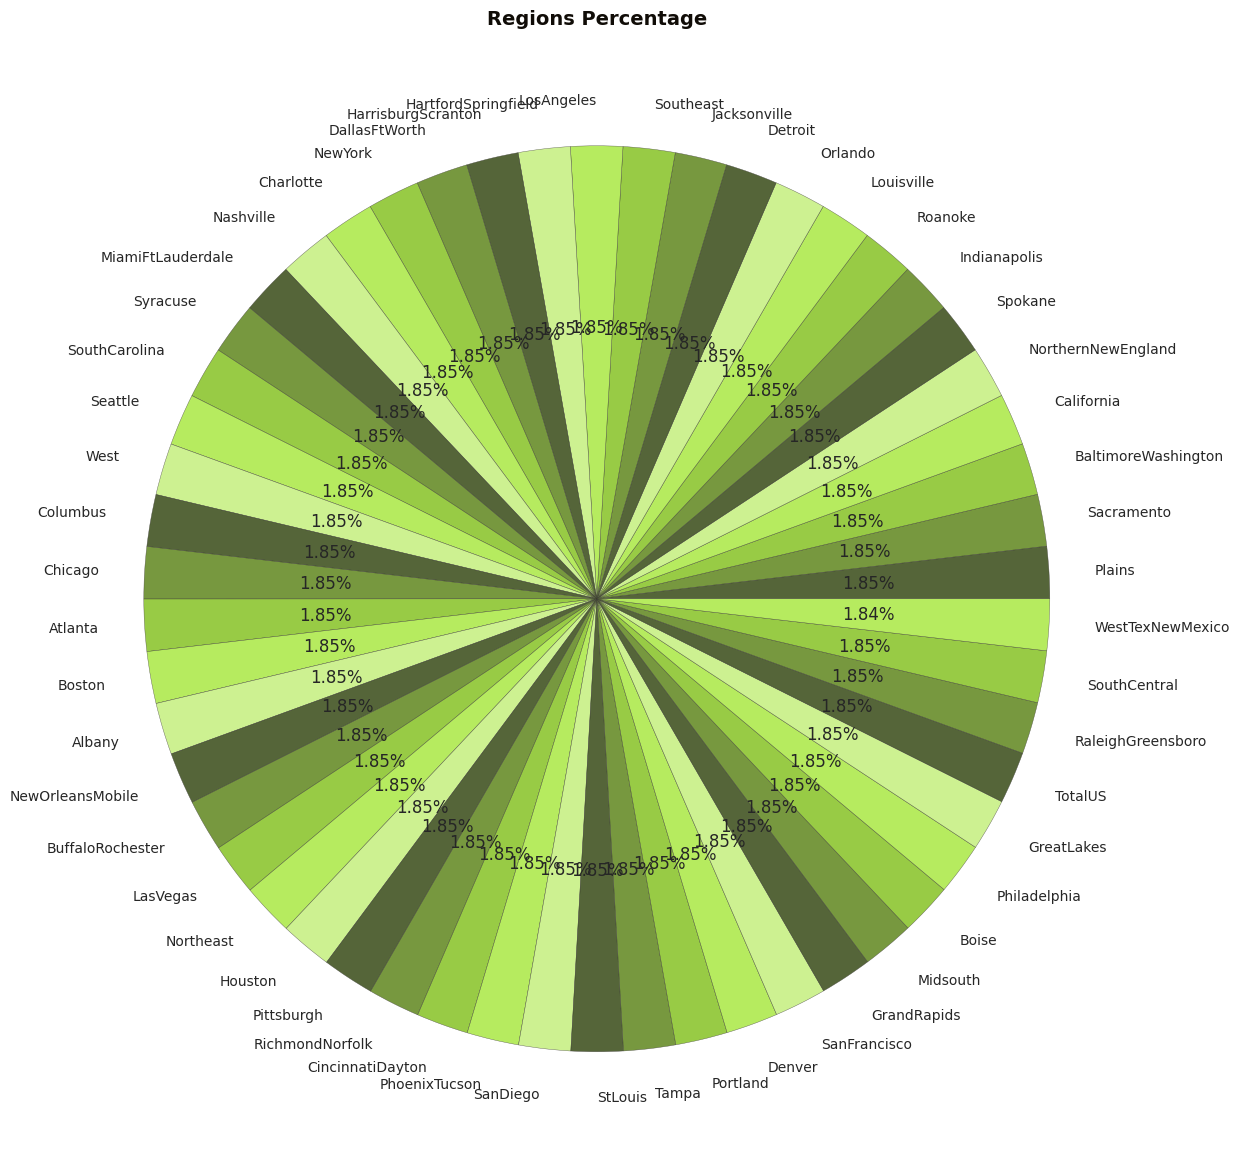

In [11]:
# --- Colors and Labels (Null Values Dropped) ---
colors = olive_grad[0:5]
labels = ds['region'].dropna().unique()
order = ds['region'].value_counts().index

# --- Pie Chart ---
plt.figure(figsize = (15, 15))
plt.title('Regions Percentage', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
plt.pie(ds['region'].value_counts(), labels = order, colors = colors, 
        wedgeprops = dict(alpha = 0.8, edgecolor = black_grad[1]), autopct = '%.2f%%');

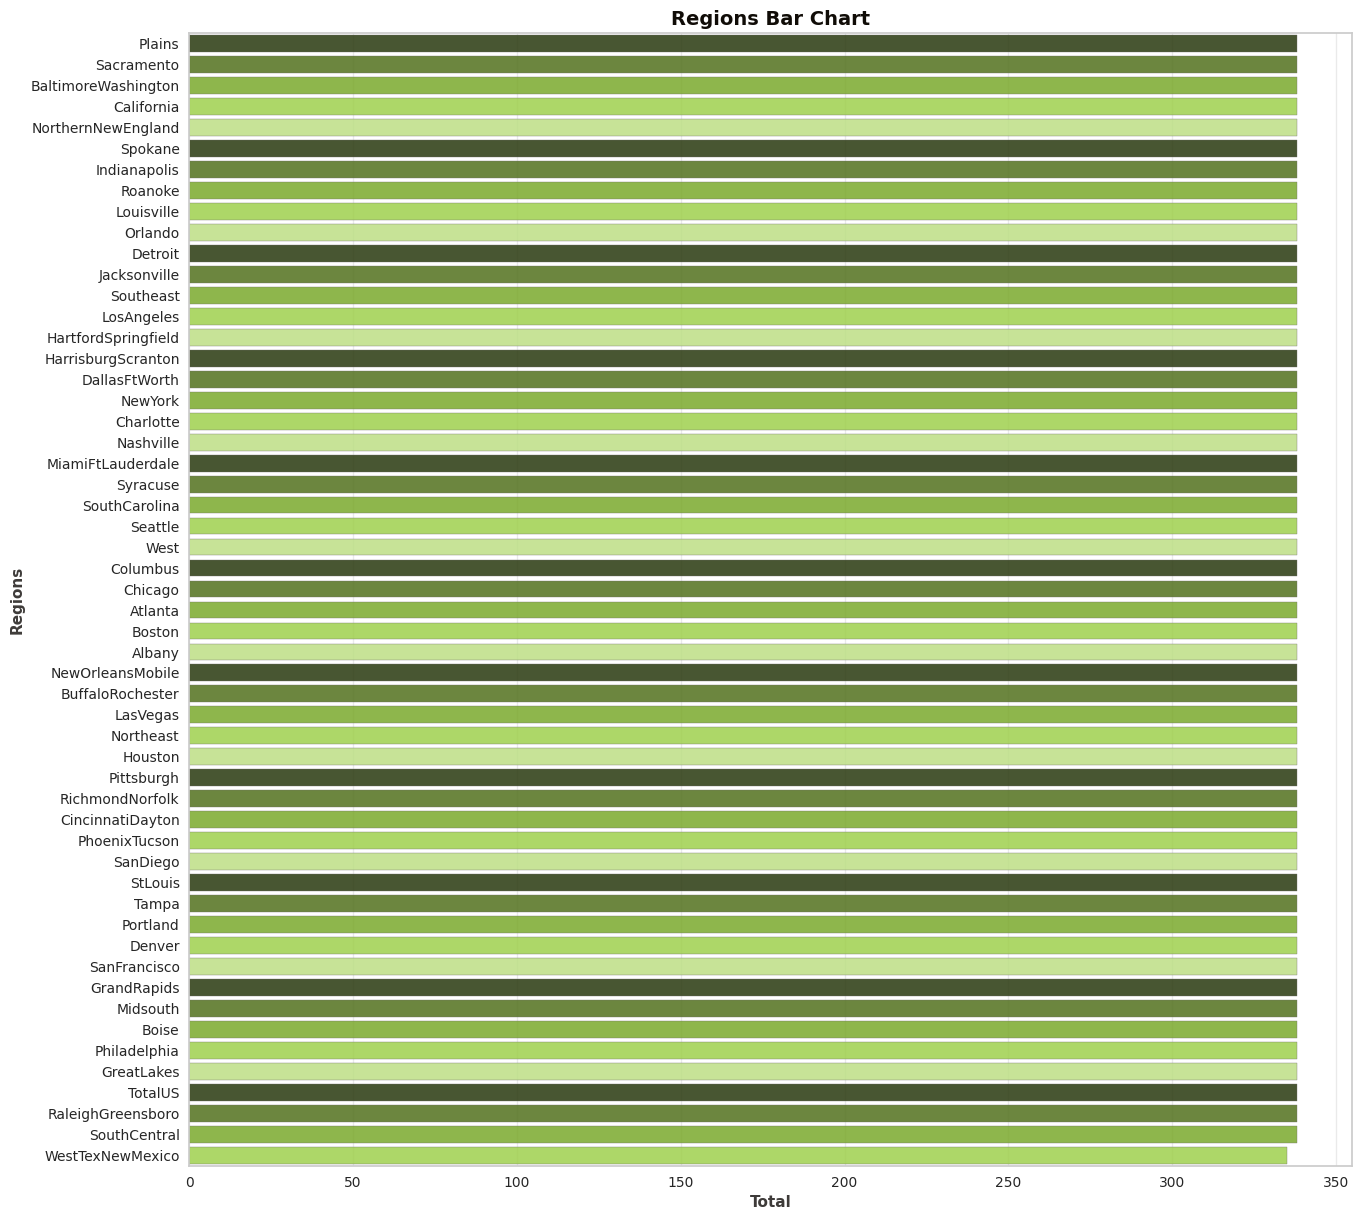

In [12]:
# --- Bar Chart ---
plt.figure(figsize = (15, 15))
plt.title('Regions Bar Chart', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
sns.countplot(y = 'region', data = ds, order = order, palette = colors, edgecolor = black_grad[2], alpha = 0.85)
plt.xlabel('Total', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Regions', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'x', alpha = 0.4);

In [13]:
# --- Descriptive Statistics ---
ds[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 
    'XLarge Bags']].describe().T.style.background_gradient(cmap='YlOrBr').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.000000,1.405978,0.402677,0.440000,1.100000,1.370000,1.660000,3.250000
Total Volume,18249.000000,850644.013009,3453545.355399,84.560000,10838.580000,107376.760000,432962.290000,62505646.520000
4046,18249.000000,293008.424531,1264989.081763,0.000000,854.070000,8645.300000,111020.200000,22743616.170000
4225,18249.000000,295154.568356,1204120.401135,0.000000,3008.780000,29061.020000,150206.860000,20470572.610000
4770,18249.000000,22839.735993,107464.068435,0.000000,0.000000,184.990000,6243.420000,2546439.110000
Total Bags,18249.000000,239639.202060,986242.399216,0.000000,5088.640000,39743.830000,110783.370000,19373134.370000
Small Bags,18249.000000,182194.686696,746178.514962,0.000000,2849.420000,26362.820000,83337.670000,13384586.800000
Large Bags,18249.000000,54338.088145,243965.964547,0.000000,127.470000,2647.710000,22029.250000,5719096.610000
XLarge Bags,18249.000000,3106.426507,17692.894652,0.000000,0.000000,0.000000,132.500000,551693.650000


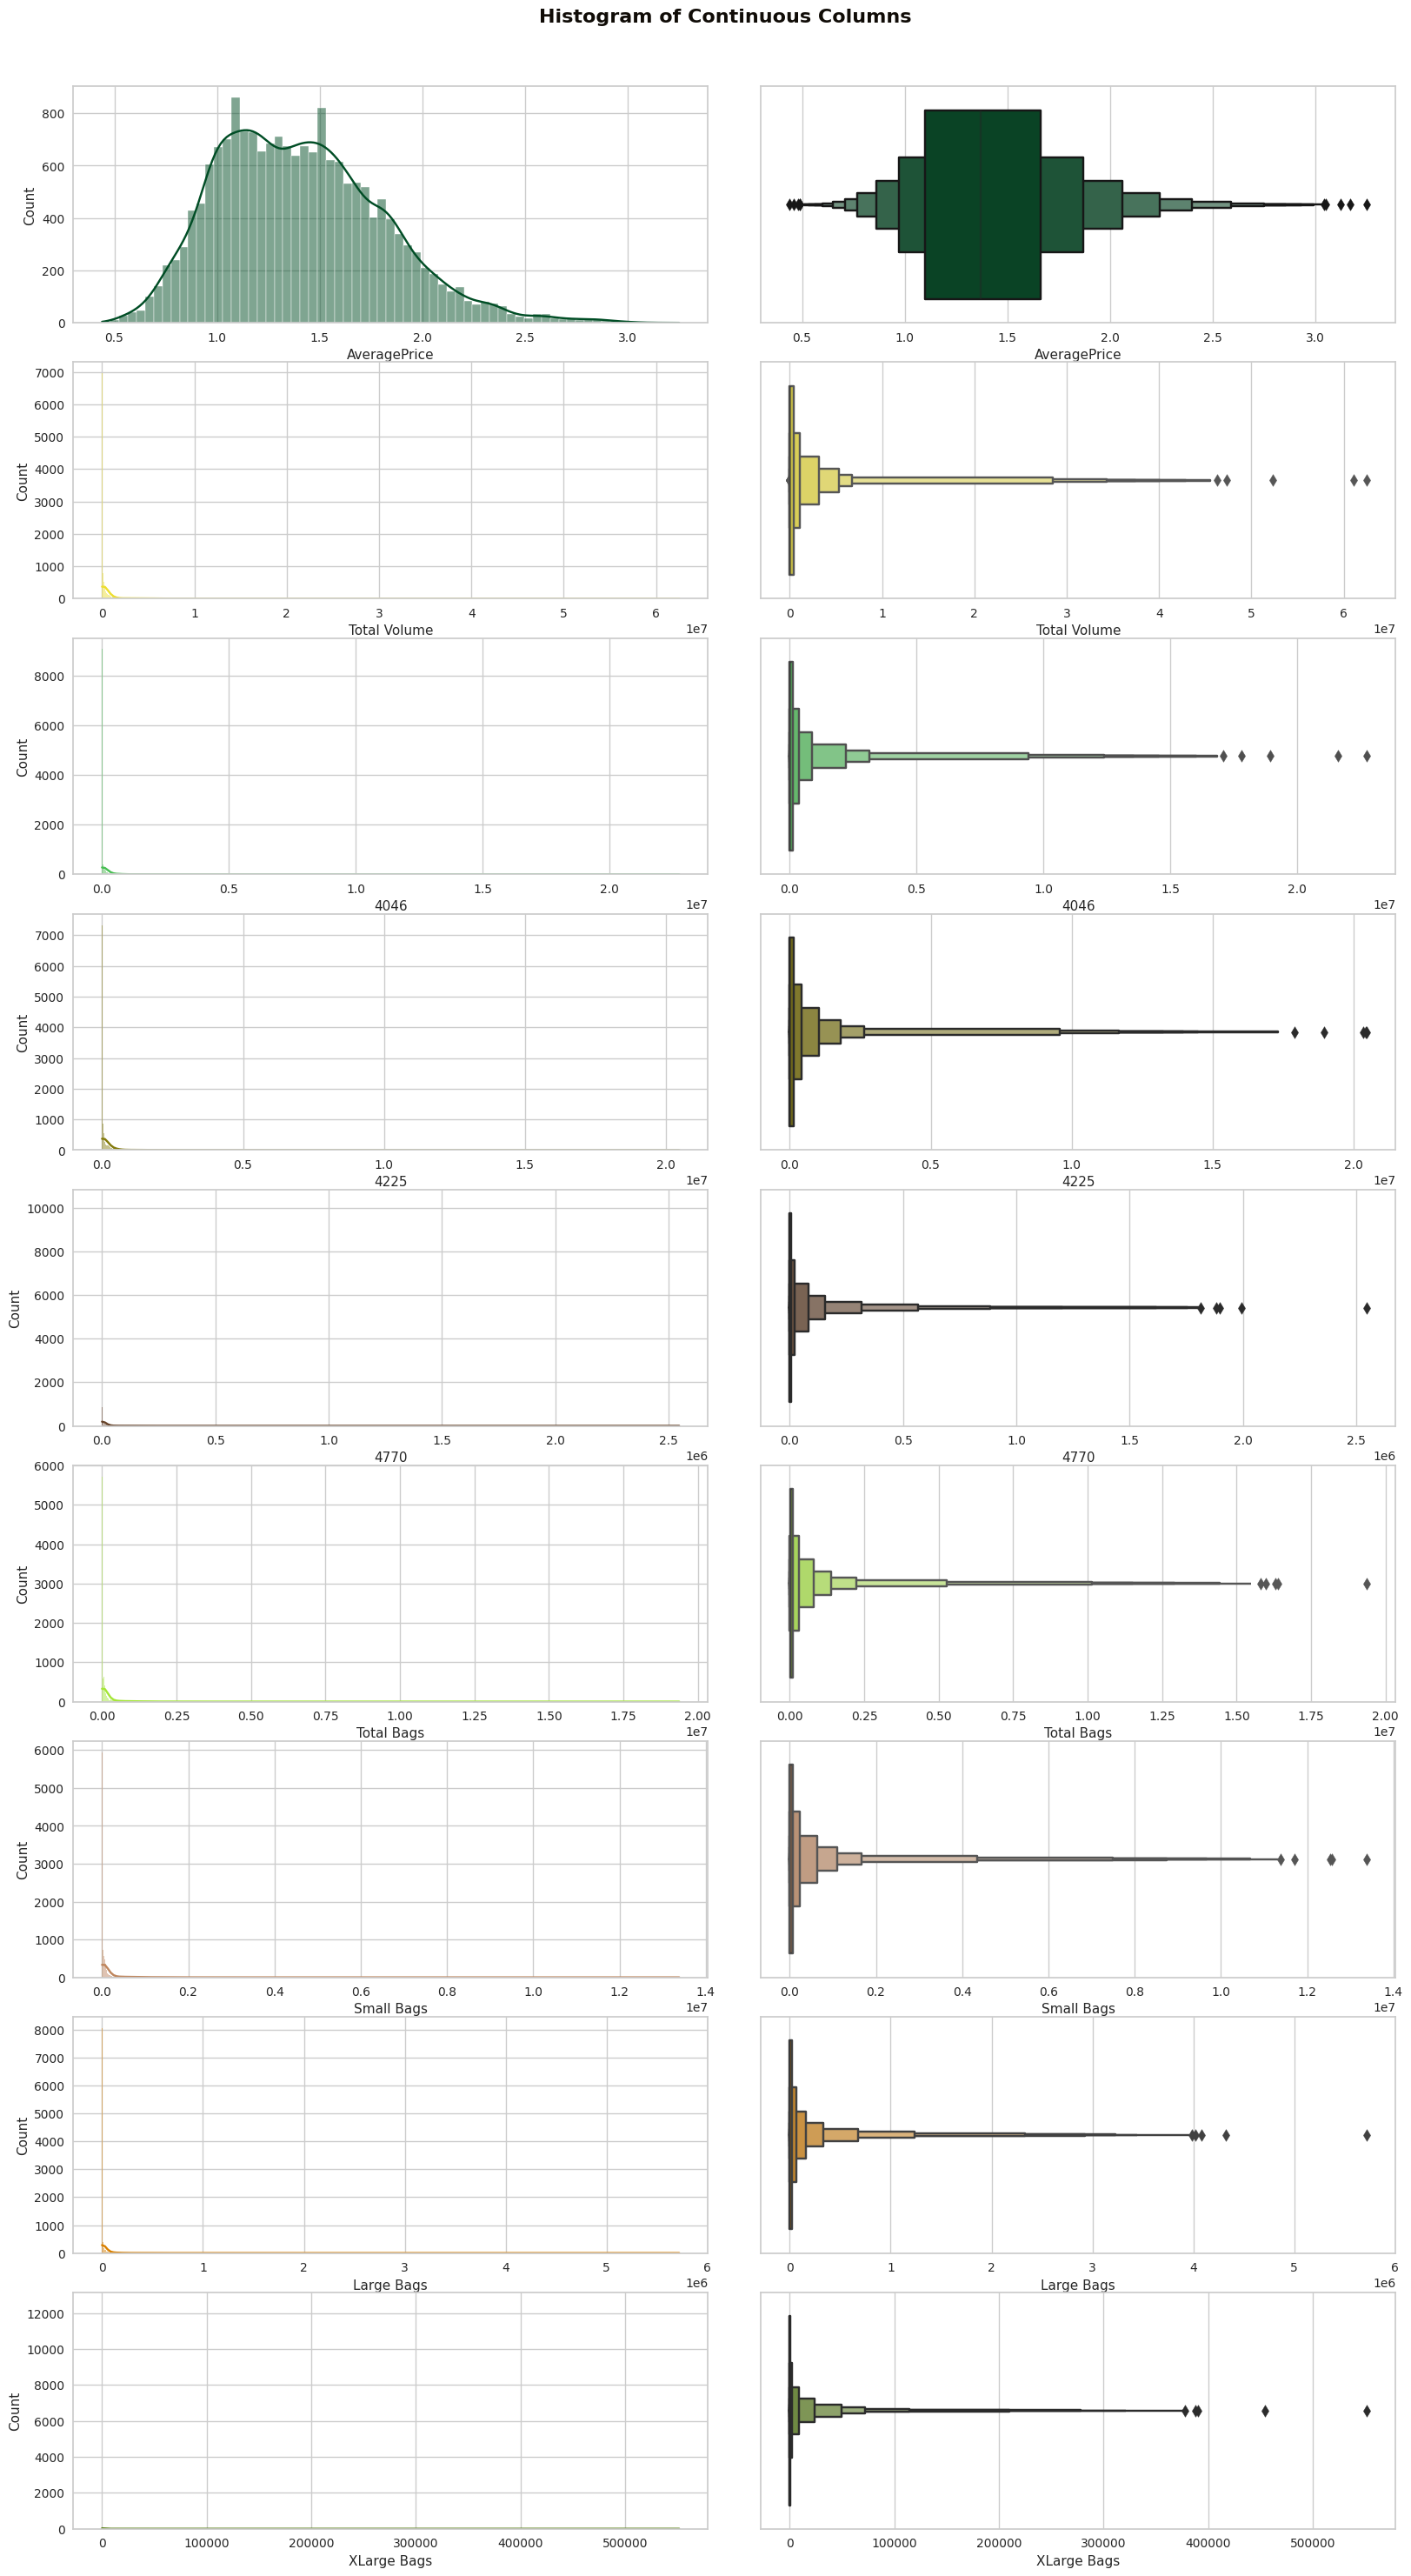

In [14]:
# --- Plot Size ---
fig, axs = plt.subplots(9, 2, figsize = (16, 30))

# --- General Title ---
fig.tight_layout()
fig.subplots_adjust(top = 0.95)
fig.suptitle('Histogram of Continuous Columns', fontweight = 'bold', fontsize = 16, fontfamily = 'sans-serif', 
             color = black_grad[0])

# --- Continuous Variables (Row 1) ---
sns.histplot(data = ds, x = 'AveragePrice', kde = True, ax = axs[0, 0], color = '#004D25')
sns.boxenplot(data = ds, x = 'AveragePrice', ax = axs[0, 1], color = '#004D25')

# --- Continuous Variables (Row 2) ---
sns.histplot(data = ds, x = 'Total Volume', kde = True, ax = axs[1, 0], color = '#EDDE30')
sns.boxenplot(data = ds, x = 'Total Volume', ax = axs[1, 1], color = '#EDDE30')

# --- Continuous Variables (Row 3) ---
sns.histplot(data = ds, x='4046', kde = True, ax = axs[2, 0], color = '#48BF53')
sns.boxenplot(data = ds, x = '4046', ax = axs[2, 1], color = '#48BF53')

# --- Continuous Variables (Row 4) ---
sns.histplot(data = ds, x = '4225', kde = True, ax = axs[3, 0], color = '#837A0B')
sns.boxenplot(data = ds, x = '4225', ax = axs[3, 1], color = '#837A0B')

# --- Continuous Variables (Row 5) ---
sns.histplot(data = ds, x = '4770', kde = True, ax = axs[4, 0], color = '#664228')
sns.boxenplot(data = ds, x = '4770', ax = axs[4, 1], color = '#664228')

# --- Continuous Variables (Row 6) ---
sns.histplot(data = ds, x = 'Total Bags', kde = True, ax = axs[5, 0], color = '#A4E637')
sns.boxenplot(data = ds, x = 'Total Bags', ax = axs[5, 1], color = '#A4E637')

# --- Continuous Variables (Row 7) ---
sns.histplot(data = ds, x = 'Small Bags', kde = True, ax = axs[6, 0], color = '#BF865D')
sns.boxenplot(data = ds, x = 'Small Bags', ax = axs[6, 1], color = '#BF865D')

# --- Continuous Variables (Row 8) ---
sns.histplot(data = ds, x = 'Large Bags', kde = True, ax = axs[7, 0], color = '#D98000')
sns.boxenplot(data = ds, x = 'Large Bags', ax = axs[7, 1], color = '#D98000')

# --- Continuous Variables (Row 9) ---
sns.histplot(data = ds, x = 'XLarge Bags', kde = True, ax = axs[8, 0], color = '#557F0F')
sns.boxenplot(data = ds, x = 'XLarge Bags', ax = axs[8, 1], color = '#557F0F');

In [15]:
# --- Skewness of Continuous Variables ---
print('\033[92m\033[1m'+'.: Continuous Columns Skewness :.'+'\033[0m')
print('\033[92m*' * 34+'\033[0m')
ds[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 
    'XLarge Bags']].skew(axis = 0, skipna = True)

.: Continuous Columns Skewness :.
**********************************


AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
dtype: float64

In [16]:
# --- Kurtoisis of Continuous Variables ---
print('\033[92m\033[1m'+'.: Continuous Columns Kurtosis :.'+'\033[0m')
print('\033[92m*' * 34+'\033[0m')
ds[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 
    'XLarge Bags']].kurt(axis = 0, skipna = True)

.: Continuous Columns Kurtosis :.
**********************************


AveragePrice      0.325196
Total Volume     92.104458
4046             86.809113
4225             91.949022
4770            132.563441
Total Bags      112.272156
Small Bags      107.012885
Large Bags      117.999481
XLarge Bags     233.602612
dtype: float64

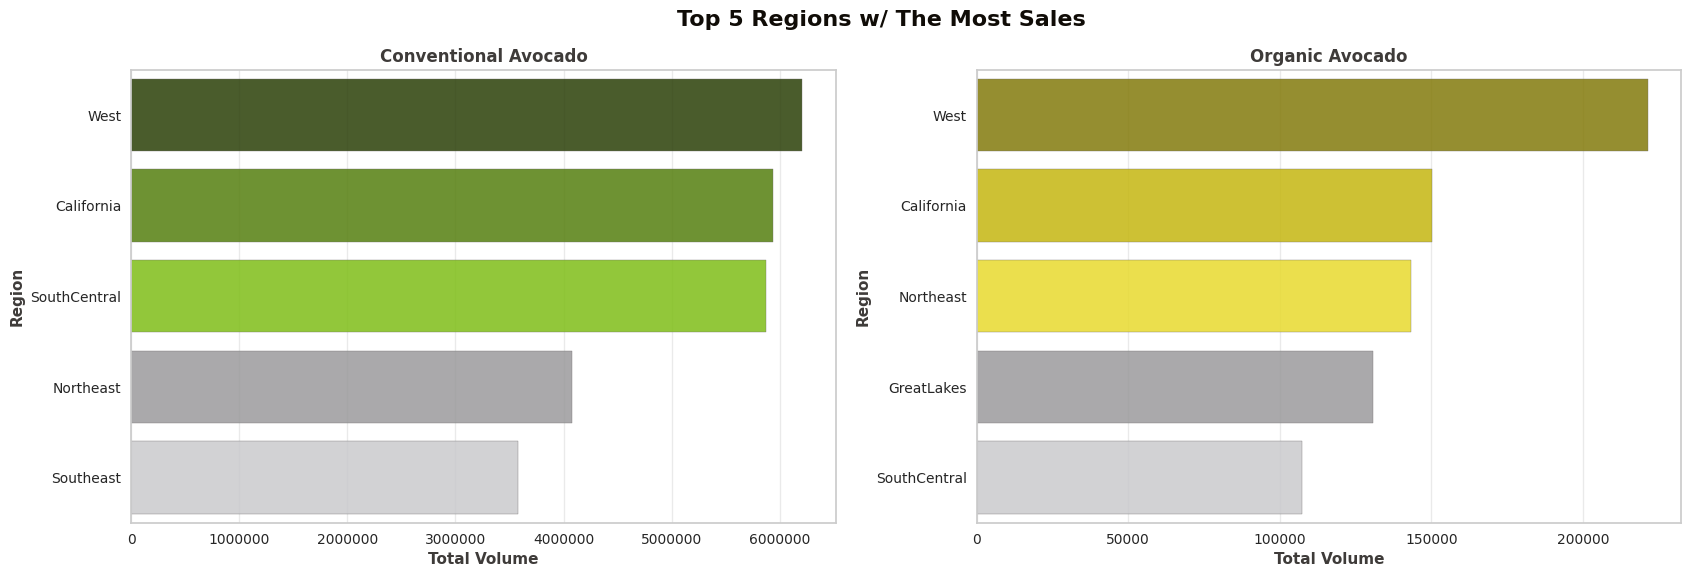

In [17]:
# --- Create New Dataframes based on Type ---
eda0 = ds.xs(['region', 'Total Volume'], axis = 1)[ds.type == 'conventional']
eda0 = eda0[eda0['region'] != 'TotalUS']
eda0 = eda0.groupby(['region']).aggregate({'Total Volume': np.mean}).sort_values(by = 'Total Volume',
                                                                                 ascending = False).iloc[:5]

eda1 = ds.xs(['region', 'Total Volume'], axis = 1)[ds.type == 'organic']
eda1 = eda1[eda1['region'] != 'TotalUS']
eda1 = eda1.groupby(['region']).aggregate({'Total Volume': np.mean}).sort_values(by = 'Total Volume', 
                                                                                 ascending = False).iloc[:5]

# --- General Settings of Bar Charts ---
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Top 5 Regions w/ The Most Sales', fontweight = 'heavy', fontsize = 16, fontfamily = 'sans-serif',
             color = black_grad[0])

# --- Bar Chart Left ---
plt.subplot(1, 2, 1)
plt.title('Conventional Avocado', fontweight = 'bold', fontsize = 12, fontfamily = 'sans-serif', color = black_grad[1])
bar_left = sns.barplot(x='Total Volume', y = eda0.index, data = eda0, palette = black_grad, edgecolor = black_grad[2], 
                       alpha = 0.85)
bar_left.patches[0].set_facecolor(olive_grad[0])
bar_left.patches[1].set_facecolor(olive_grad[1])
bar_left.patches[2].set_facecolor(olive_grad[2])
plt.xlabel('Total Volume', fontweight='bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Region', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0)
plt.grid(axis = 'x', alpha = 0.4)
plt.ticklabel_format(style = 'plain', axis = 'x')

# --- Bar Chart Right ---
plt.subplot(1, 2, 2)
plt.title('Organic Avocado', fontweight = 'bold', fontsize = 12, fontfamily = 'sans-serif', color = black_grad[1])
bar_right = sns.barplot(x='Total Volume', y = eda1.index, data = eda1, palette = black_grad, edgecolor = black_grad[2],
                        alpha = 0.85)
bar_right.patches[0].set_facecolor(yellow_grad[1])
bar_right.patches[1].set_facecolor(yellow_grad[2])
bar_right.patches[2].set_facecolor(yellow_grad[3])
plt.xlabel('Total Volume', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Region', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0)
plt.grid(axis = 'x', alpha = 0.4)
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.show();

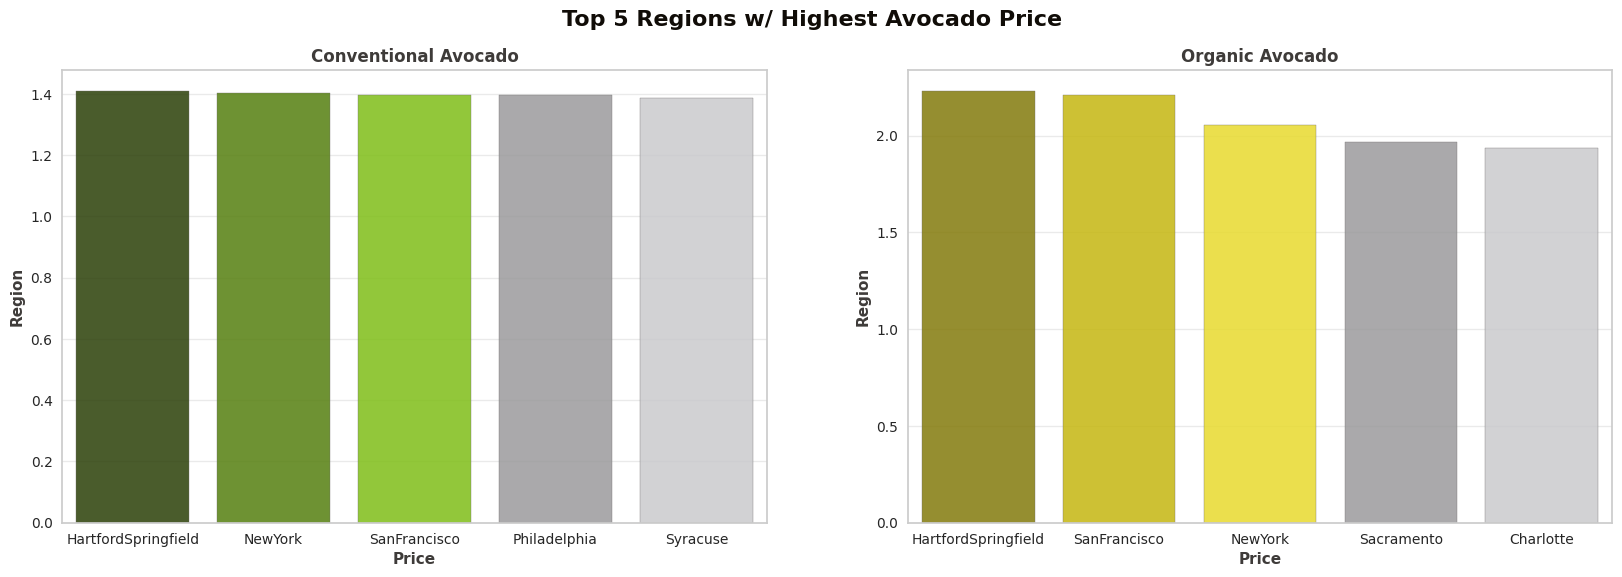

In [18]:
# --- Create New Dataframes based on Type ---
eda2 = ds.xs(['region', 'AveragePrice'], axis = 1)[ds.type == 'conventional']
eda2 = eda2.groupby(['region']).aggregate({'AveragePrice': np.mean}).sort_values(by = 'AveragePrice', 
                                                                                 ascending = False).iloc[:5]

eda3 = ds.xs(['region', 'AveragePrice'], axis = 1)[ds.type == 'organic']
eda3 = eda3.groupby(['region']).aggregate({'AveragePrice': np.mean}).sort_values(by = 'AveragePrice',
                                                                                 ascending = False).iloc[:5]

# --- General Settings of Bar Charts ---
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Top 5 Regions w/ Highest Avocado Price', fontweight = 'heavy', fontsize = 16, fontfamily = 'sans-serif', 
             color = black_grad[0])

# --- Bar Chart Left ---
plt.subplot(1, 2, 1)
plt.title('Conventional Avocado', fontweight = 'bold', fontsize = 12, fontfamily = 'sans-serif', color = black_grad[1])
bar_left = sns.barplot(y = 'AveragePrice', x = eda2.index, data = eda2, palette = black_grad, edgecolor = black_grad[2],
                       alpha = 0.85)
bar_left.patches[0].set_facecolor(olive_grad[0])
bar_left.patches[1].set_facecolor(olive_grad[1])
bar_left.patches[2].set_facecolor(olive_grad[2])
plt.xlabel('Price', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Region', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
plt.grid(axis = 'x', alpha = 0)
plt.ticklabel_format(style = 'plain', axis = 'y')

# --- Bar Chart Right ---
plt.subplot(1, 2, 2)
plt.title('Organic Avocado', fontweight = 'bold', fontsize = '12', fontfamily = 'sans-serif', color = black_grad[1])
bar_right = sns.barplot(y='AveragePrice', x = eda3.index, data = eda3, palette = black_grad, edgecolor = black_grad[2],
                        alpha = 0.85)
bar_right.patches[0].set_facecolor(yellow_grad[1])
bar_right.patches[1].set_facecolor(yellow_grad[2])
bar_right.patches[2].set_facecolor(yellow_grad[3])
plt.xlabel('Price', fontweight='bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Region', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
plt.grid(axis = 'x', alpha = 0)
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.show();

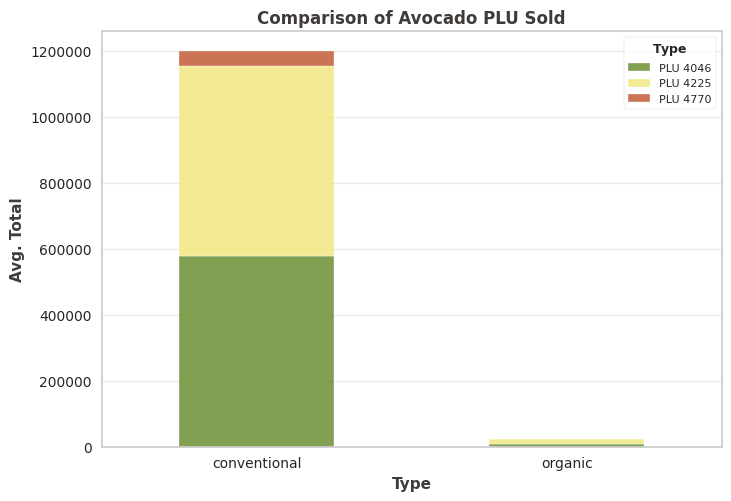

In [19]:
# --- Creating New Data Frame ---
eda30 = ds.xs(['type', '4046', '4225', '4770'], axis = 1)
eda30 = eda30.groupby(['type']).aggregate({'4046': np.mean, '4225': np.mean, '4770': np.mean})

# --- Stacked Bar Chart ---
eda30.plot(kind='bar', stacked = True, color = color_mix[-4:-1], alpha = 0.85)
plt.title('Comparison of Avocado PLU Sold', fontweight = 'bold', fontsize = '12', fontfamily = 'sans-serif', 
          color = black_grad[1])
plt.xlabel('Type', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Avg. Total', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
plt.grid(axis = 'x', alpha = 0)
plt.legend(labels = ['PLU 4046','PLU 4225', 'PLU 4770'], title = '$\\bf{Type}$', fontsize = '8', title_fontsize = '9',
           loc = 'upper right', frameon = True)
plt.xticks(rotation = 0)
plt.ticklabel_format(style = 'plain', axis = 'y');

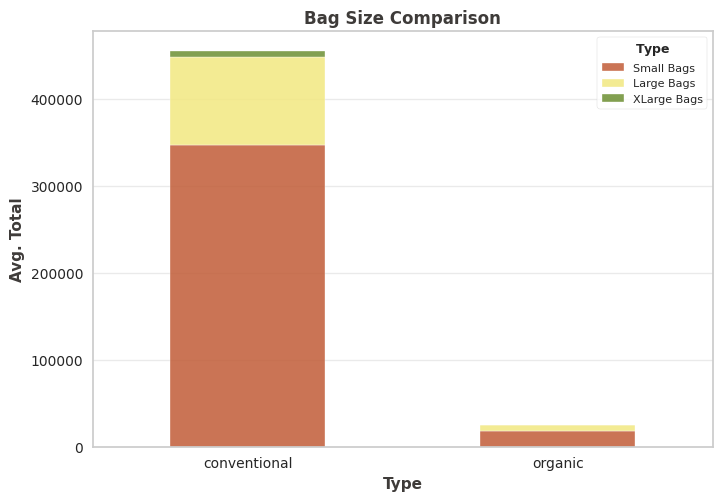

In [20]:
# --- Creating New Data Frame ---
eda31 = ds.xs(['type', 'Small Bags', 'Large Bags', 'XLarge Bags'], axis = 1)
eda31 = eda31.groupby(['type']).aggregate({'Small Bags': np.mean, 'Large Bags': np.mean, 'XLarge Bags': np.mean})

# --- Stacked Bar Chart ---
eda31.plot(kind = 'bar', stacked = True, color = color_mix[3:0:-1], alpha = 0.85)
plt.title('Bag Size Comparison', fontweight = 'bold', fontsize = 12, fontfamily = 'sans-serif', color = black_grad[1])
plt.xlabel('Type', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Avg. Total', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
plt.grid(axis = 'x', alpha = 0)
plt.legend(labels = ['Small Bags','Large Bags', 'XLarge Bags'], title = '$\\bf{Type}$', fontsize = 8, title_fontsize = 9,
           loc = 'upper right', frameon = True)
plt.xticks(rotation = 0)
plt.ticklabel_format(style = 'plain', axis = 'y');

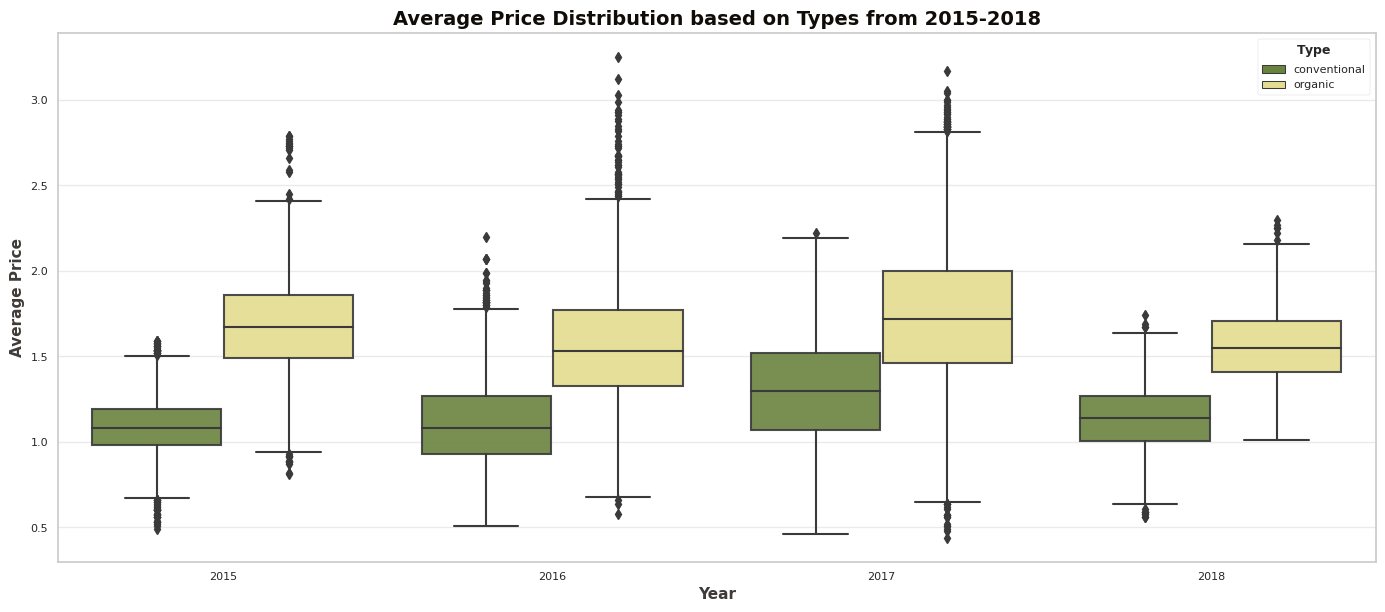

In [21]:
# --- Creating Box Plot based on Type ---
fig, ax = plt.subplots()
fig.set_size_inches(17, 7)
plt.title('Average Price Distribution based on Types from 2015-2018', fontweight='bold', fontsize = 14, 
          fontfamily = 'sans-serif', color = black_grad[0])
sns.boxplot(x = 'year', y = 'AveragePrice', hue = 'type', data = ds, ax = ax, palette = color_mix[1:3], 
            boxprops = dict(alpha = 0.9), linewidth = 1.5)
plt.xlabel('Year', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Average Price', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.legend(title = '$\\bf{Type}$', fontsize = 8, title_fontsize = 9, loc = 'upper right', frameon = True)
plt.grid(axis = 'y', alpha = 0.4)
plt.show()

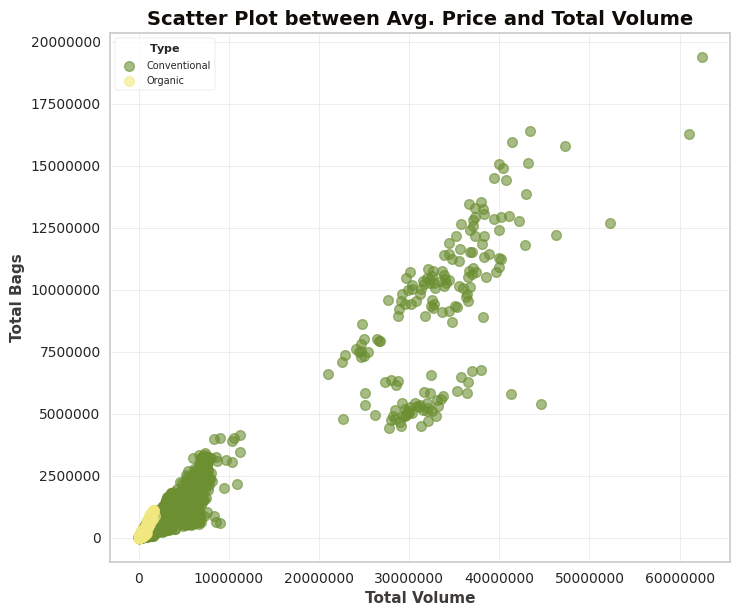

In [22]:
# --- Seperating Total Volume & Total Bags based on Type ---
x0 = ds.xs('Total Volume', axis = 1)[ds.type == 'conventional']
x1 = ds.xs('Total Volume', axis = 1)[ds.type == 'organic']
y0 = ds.xs('Total Bags', axis = 1)[ds.type == 'conventional']
y1 = ds.xs('Total Bags', axis = 1)[ds.type == 'organic']

# --- Creating Scatter Plot ---
plt.figure(figsize = (8, 7))
plt.title('Scatter Plot between Avg. Price and Total Volume', fontweight = 'bold', fontsize = 14, 
          fontfamily = 'sans-serif', color = black_grad[0])
plt.scatter(x = x0, y = y0, c = color_mix[1], alpha = 0.6, linewidths = 1)
plt.scatter(x = x1, y = y1, c = color_mix[2], alpha = 0.6, linewidths = 1)
plt.legend(['Conventional', 'Organic'], title = '$\\bf{Type}$', fontsize = 7, title_fontsize = 8, loc = 'upper left',
           frameon = True)
plt.xlabel('Total Volume', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Total Bags', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ticklabel_format(style = 'plain', axis = 'both')
plt.grid(axis = 'both', alpha = 0.5, lw = 0.5)
plt.show()

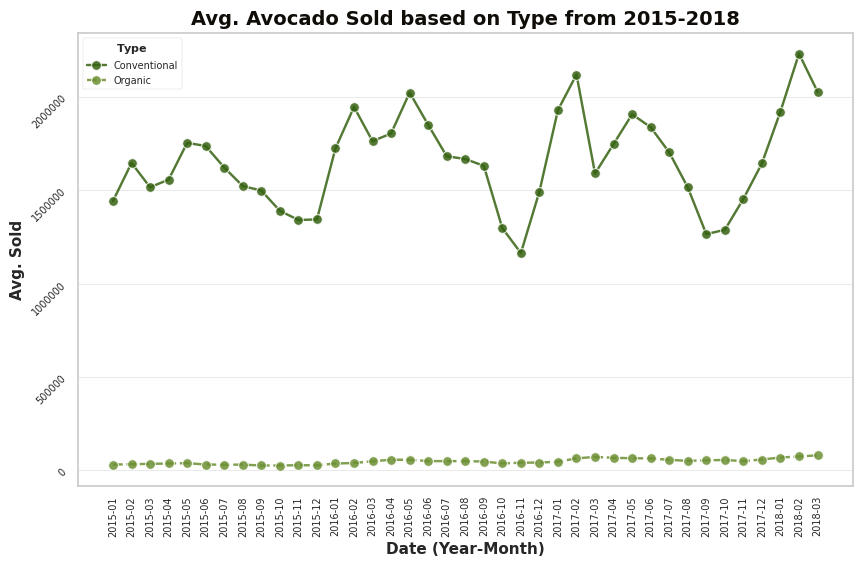

In [23]:
# --- Calculating Mean of `Total Volume` grouped by Type and Date ---
dseda8 = ds[['Date', 'Total Volume', 'type']]
dseda8['Date'] = pd.DatetimeIndex(dseda8['Date'])
dseda8['Date'] = dseda8['Date'].apply(lambda x: x.strftime('%Y-%m'))
group8 = dseda8.groupby(['Date', 'type'])
mnth_avg8 = group8.aggregate({'Total Volume': np.mean})

# --- Creating Time Series Plot of Avg. Price ---
plt.figure(figsize = (10, 6))
plt.title('Avg. Avocado Sold based on Type from 2015-2018', fontweight = 'bold', fontsize = 14,
          fontfamily = 'sans-serif', color = black_grad[0])
sns.lineplot(data = mnth_avg8, x = 'Date', y = 'Total Volume', hue = 'type', style = 'type', markers = ['o', 'o'],
             palette = color_mix[0:2], alpha = 0.85)
plt.xlabel('Date (Year-Month)', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ylabel('Avg. Sold', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = '90', fontsize = 7)
plt.yticks(rotation = '45', fontsize = 7)
plt.grid(axis='y', alpha = 0.5, lw = 0.6)
plt.grid(axis='x', alpha = 0)
plt.legend(labels = ['Conventional', 'Organic'], title = '$\\bf{Type}$', fontsize = 7, title_fontsize = 8, frameon=True);

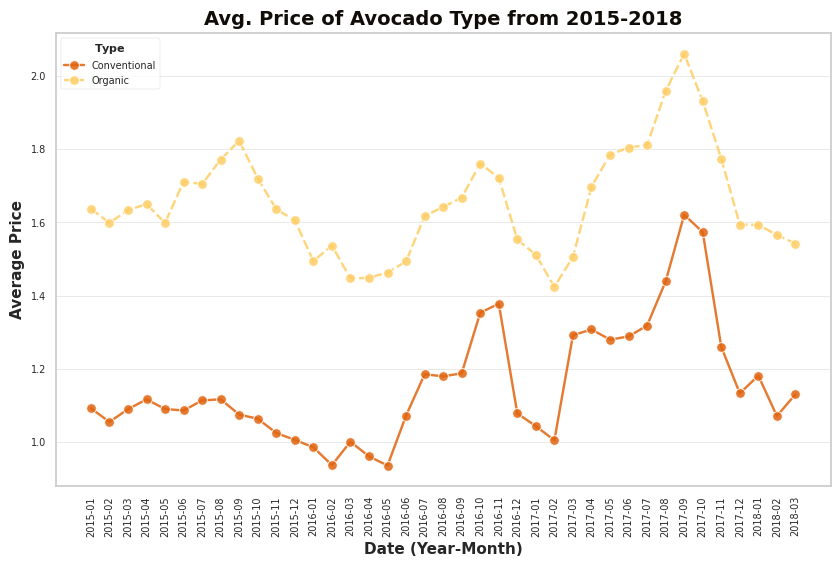

In [24]:
# --- Calculating Mean of `AveragePrice` grouped by Type and Date ---
dseda9 = ds[['Date', 'AveragePrice', 'type']]
dseda9['Date'] = pd.DatetimeIndex(dseda9['Date'])
dseda9['Date'] = dseda9['Date'].apply(lambda x: x.strftime('%Y-%m'))
group9 = dseda9.groupby(['Date', 'type'])
mnth_avg9 = group9.aggregate({'AveragePrice': np.mean})

# --- Creating Time Series Plot of Avg. Price ---
plt.figure(figsize = (10, 6))
plt.title('Avg. Price of Avocado Type from 2015-2018', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif',
          color = black_grad[0])
sns.lineplot(data = mnth_avg9, x = 'Date', y = 'AveragePrice', hue = 'type', style = 'type', markers = ['o', 'o'],
             palette = 'YlOrBr_r', alpha = 0.85)
plt.xlabel('Date (Year-Month)', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ylabel('Average Price', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.xticks(rotation = '90', fontsize = 7)
plt.yticks(fontsize = 7)
plt.grid(axis = 'y', alpha = 0.5, lw = 0.6)
plt.grid(axis = 'x', alpha = 0)
plt.legend(labels = ['Conventional', 'Organic'], title = '$\\bf{Type}$', fontsize = 7, title_fontsize = 8,
           loc = 'upper left', frameon = True);

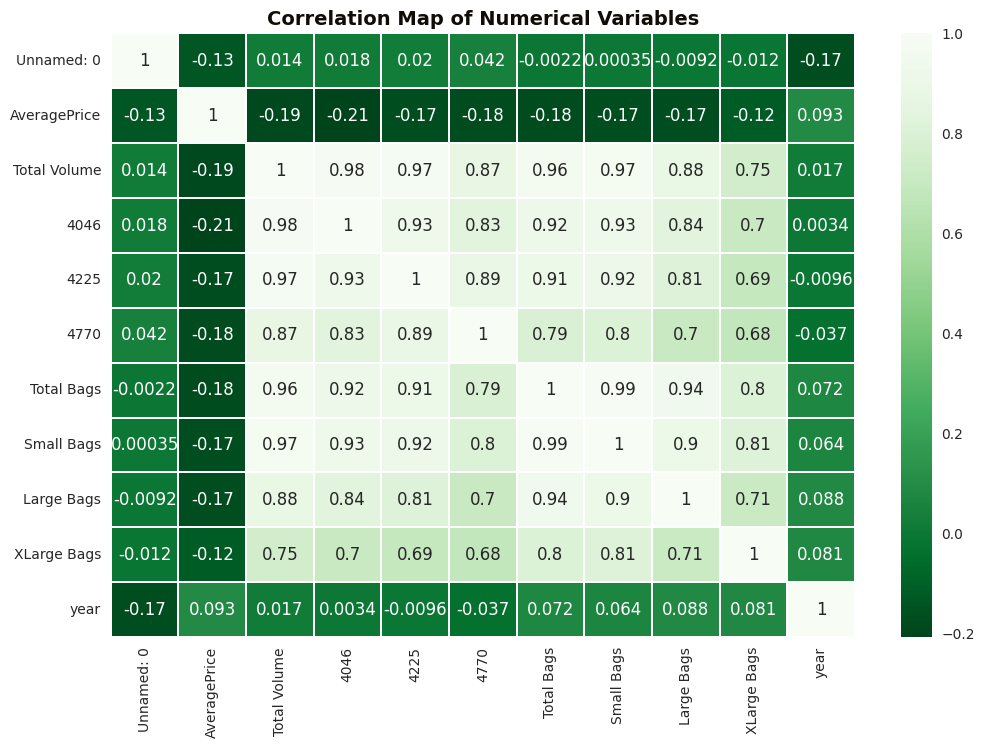

In [25]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize = (12, 8))
sns.heatmap(ds.corr(), annot = True, cmap = 'Greens_r', linewidths = 0.1)
plt.title('Correlation Map of Numerical Variables', fontsize = 14, fontweight = 'bold', fontfamily = 'sans-serif',
          color = black_grad[0]);

In [26]:
# --- Change `Date` Format to 'datetime' ---
ds.Date = pd.to_datetime(ds.Date)

# --- Extracting Month Number from `Date`  ---
ds['month'] = pd.DatetimeIndex(ds['Date']).month

In [27]:
# --- Setup PyCaret Regression Module ---
avc = setup(data = ds, target = 'AveragePrice', train_size = 0.8,
            categorical_features = ['type', 'year', 'region', 'month'], normalize = True, normalize_method = 'robust', 
            silent = True, ignore_low_variance = True, session_id = 123)

,Description,Value
0,session_id,123
1,Target,AveragePrice
2,Original Data,"(18249, 15)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(14599, 83)"


In [28]:
# --- List PyCaret Regression Models ---
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [29]:
# --- Comparing All Models ---
best_models = compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0729,0.0116,0.1076,0.9284,0.0432,0.0539,3.7040
catboost,CatBoost Regressor,0.0840,0.0132,0.1146,0.9187,0.0458,0.0615,2.2820
xgboost,Extreme Gradient Boosting,0.0877,0.0147,0.1213,0.9090,0.0484,0.0638,17.0820
rf,Random Forest Regressor,0.0851,0.0150,0.1223,0.9073,0.0492,0.0631,4.1920
lightgbm,Light Gradient Boosting Machine,0.0990,0.0178,0.1332,0.8904,0.0537,0.0732,0.1710
dt,Decision Tree Regressor,0.1169,0.0322,0.1794,0.8010,0.0721,0.0855,0.0840
knn,K Neighbors Regressor,0.1356,0.0353,0.1876,0.7825,0.0768,0.1021,0.3750
gbr,Gradient Boosting Regressor,0.1537,0.0411,0.2025,0.7465,0.0816,0.1155,1.5450
br,Bayesian Ridge,0.1819,0.0582,0.2411,0.6409,0.0974,0.1372,0.0430
ridge,Ridge Regression,0.1819,0.0582,0.2411,0.6409,0.0974,0.1372,0.0200


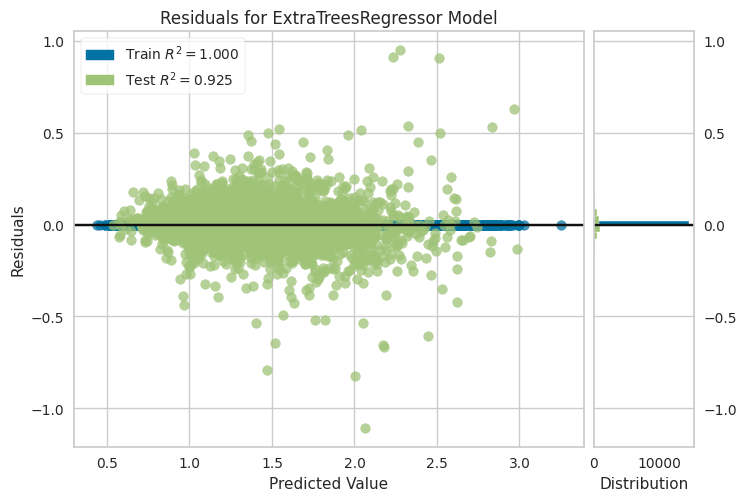

In [30]:
# --- Plot the Residual of Best Model (et) ---
plot_model(best_models)

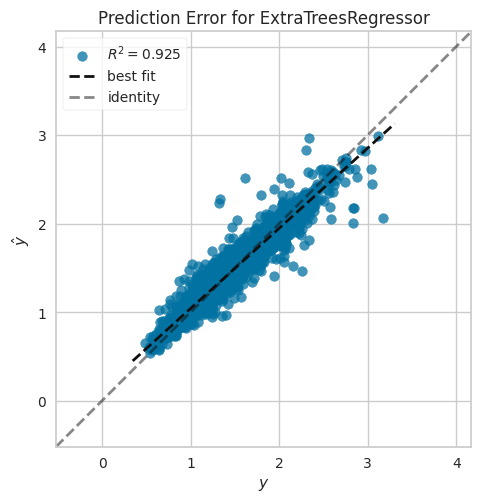

In [31]:
# --- Plot Error Prediction for Best Model ---
plot_model(best_models, plot = 'error')

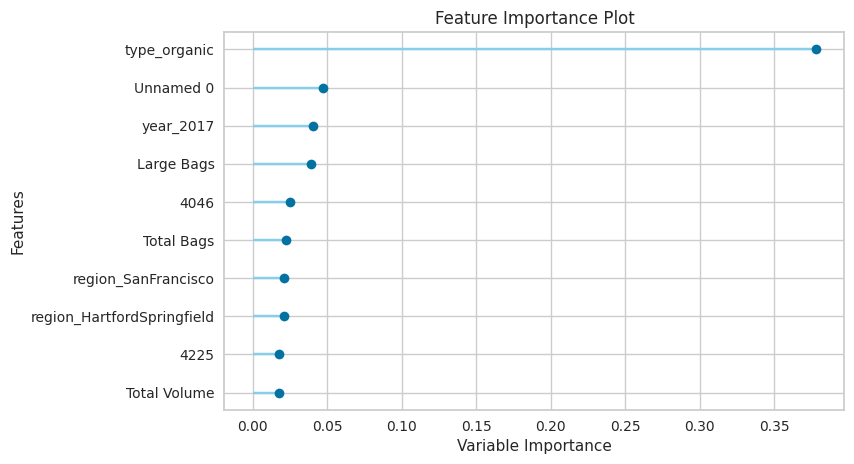

In [32]:
# --- Plot Feature Importance for Best Model ---
plot_model(best_models, plot = 'feature')

In [33]:
!pip install -U "ipywidgets>=8,<9" "jupyterlab-widgets>=3,<4"
# 필요하면 classic 노트북용도 같이 (카글에선 보통 불필요)
# !pip install -U "widgetsnbextension>=4,<5"

DEPRECATION: pytorch-lightning 1.5.10 has a non-standard dependency specifier torch>=1.7.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [34]:
# --- Tuning Best Model ---
tuned_best = tune_model(best_models)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2114,0.0771,0.2776,0.5397,0.1111,0.1613
1,0.2190,0.0795,0.2819,0.5396,0.1136,0.1669
2,0.2058,0.0687,0.2621,0.5445,0.1095,0.1645
3,0.2095,0.0756,0.2750,0.5403,0.1112,0.1618
4,0.2130,0.0738,0.2716,0.5492,0.1105,0.1645
5,0.2057,0.0702,0.2650,0.5364,0.1096,0.1634
6,0.2146,0.0762,0.2760,0.5246,0.1138,0.1699
7,0.2144,0.0826,0.2874,0.5130,0.1141,0.1612
8,0.2149,0.0776,0.2785,0.5082,0.1144,0.1688


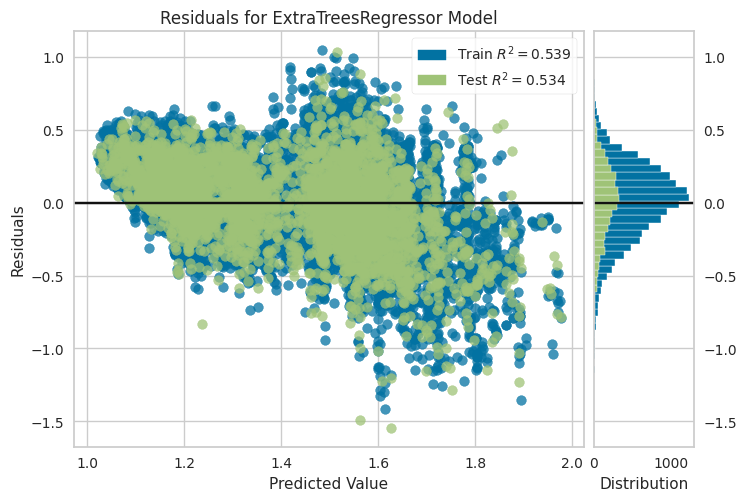

In [35]:
# --- Plot the Residual of Tuned Best Model ---
plot_model(tuned_best)

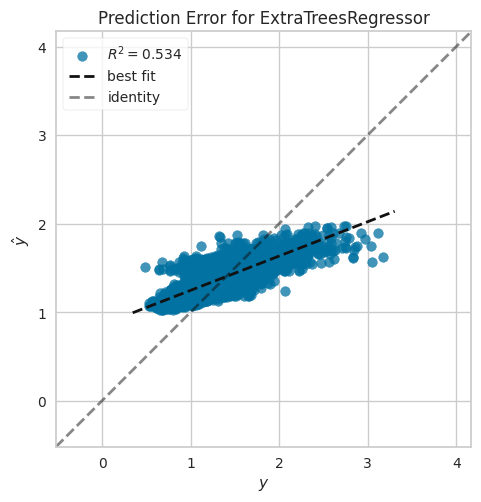

In [36]:
# --- Plot Error Prediction for Tuned Best Model ---
plot_model(tuned_best, plot = 'error')

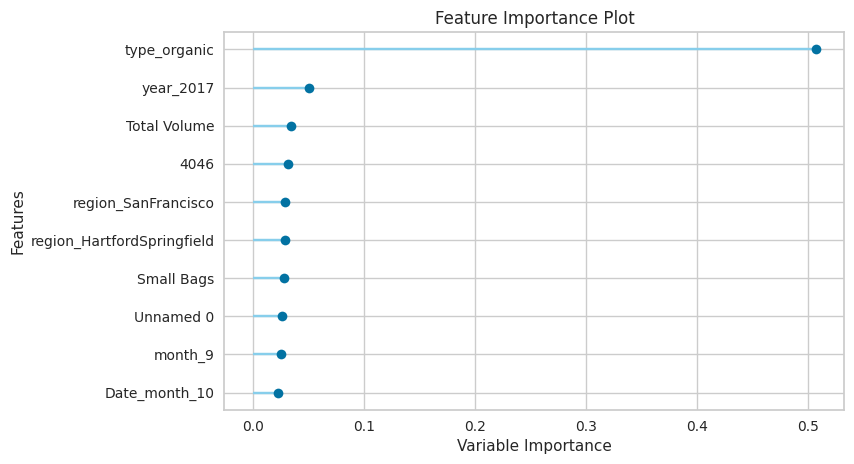

In [37]:
# --- Plot Feature Importance for Tuned Best Model ---
plot_model(tuned_best, plot = 'feature')

In [38]:
# --- Create RFR Model ---
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0855,0.0153,0.1237,0.9086,0.0488,0.0625
1,0.0866,0.0144,0.1202,0.9164,0.0493,0.0645
2,0.0846,0.0145,0.1202,0.9041,0.0496,0.0638
3,0.0833,0.0145,0.1206,0.9116,0.0483,0.0617
4,0.0797,0.0126,0.1123,0.9230,0.0446,0.0584
5,0.0820,0.0140,0.1184,0.9075,0.0479,0.0611
6,0.0870,0.0164,0.1281,0.8976,0.0512,0.0645
7,0.0872,0.0160,0.1265,0.9057,0.0501,0.0635
8,0.0893,0.0164,0.1280,0.8961,0.0521,0.0669


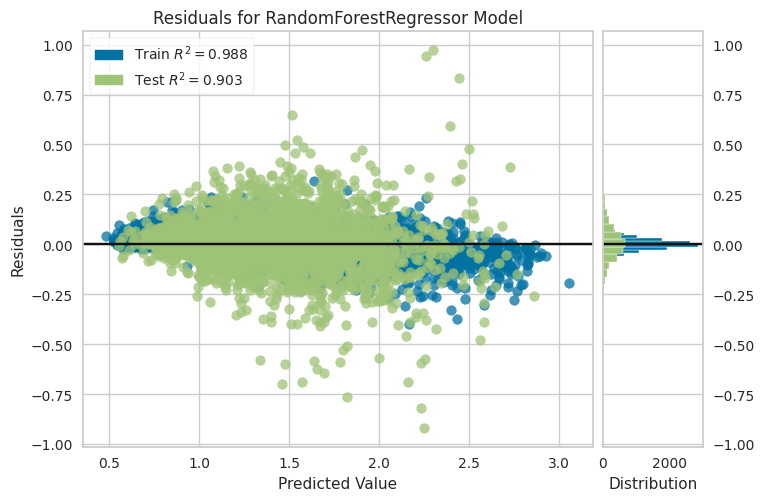

In [39]:
# --- Plot the Residual of RFR Model ---
plot_model(rf)

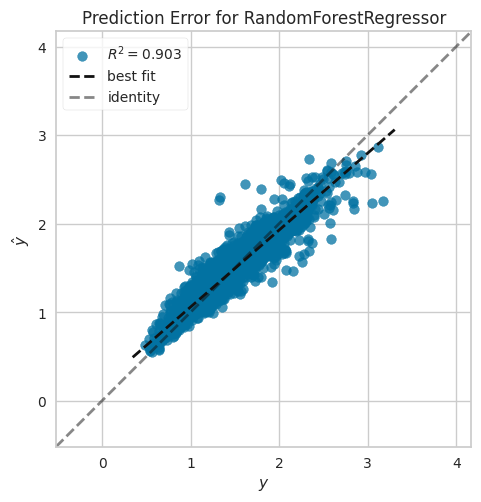

In [40]:
# --- Plot Error Prediction for RFR Model ---
plot_model(rf, plot = 'error')

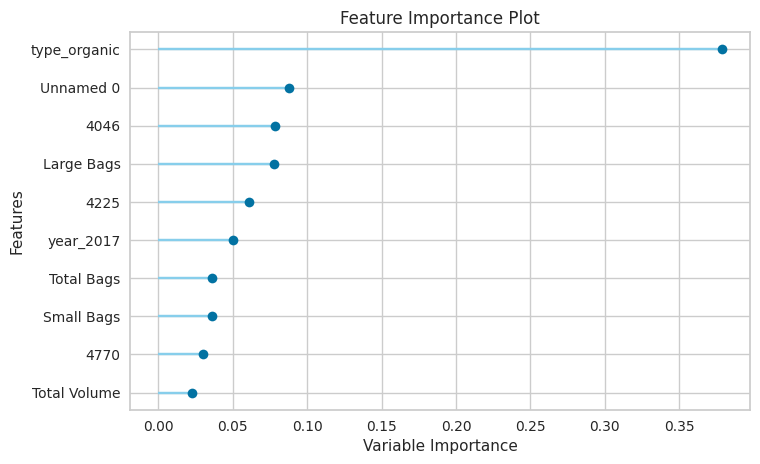

In [41]:
# --- Plot Feature Importance for RFR Model --
plot_model(rf, plot = 'feature')

In [42]:
# --- Tuning RFR Model ---
tune_rf = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1856,0.0597,0.2444,0.6432,0.0974,0.1393
1,0.1928,0.0613,0.2475,0.6451,0.0994,0.1449
2,0.1851,0.0547,0.2338,0.6375,0.0974,0.1450
3,0.1810,0.0557,0.2360,0.6615,0.0953,0.1378
4,0.1875,0.0576,0.2401,0.6480,0.0975,0.1429
5,0.1852,0.0564,0.2375,0.6277,0.0976,0.1435
6,0.1919,0.0613,0.2475,0.6177,0.1014,0.1490
7,0.1919,0.0650,0.2550,0.6167,0.1011,0.1423
8,0.1928,0.0617,0.2485,0.6087,0.1018,0.1490


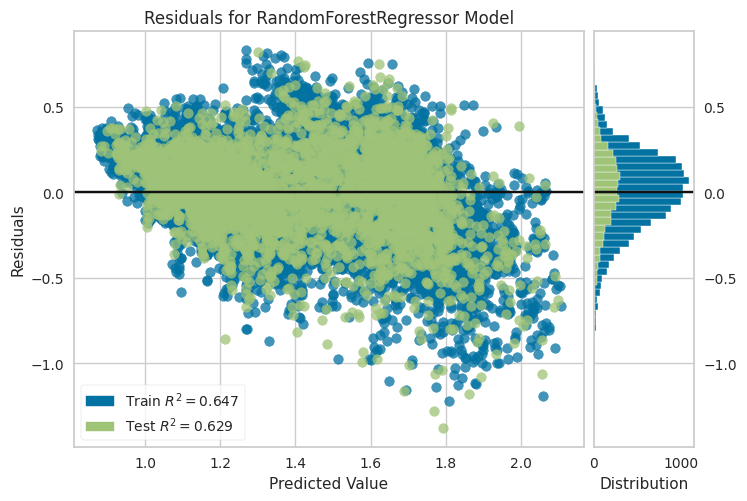

In [43]:
# --- Plot the Residual of RFR Model ---
plot_model(tune_rf)

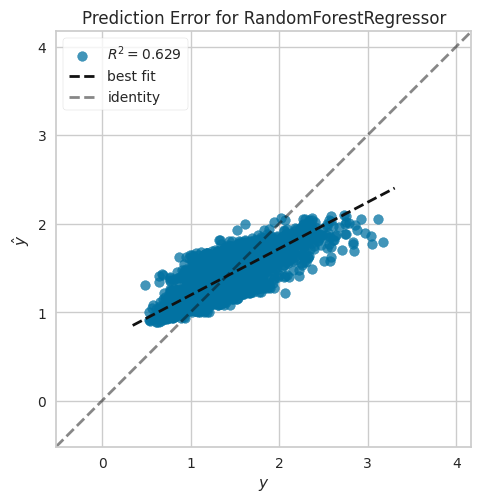

In [44]:
# --- Plot Error Prediction for Tuned RFR Model ---
plot_model(tune_rf, plot = 'error')

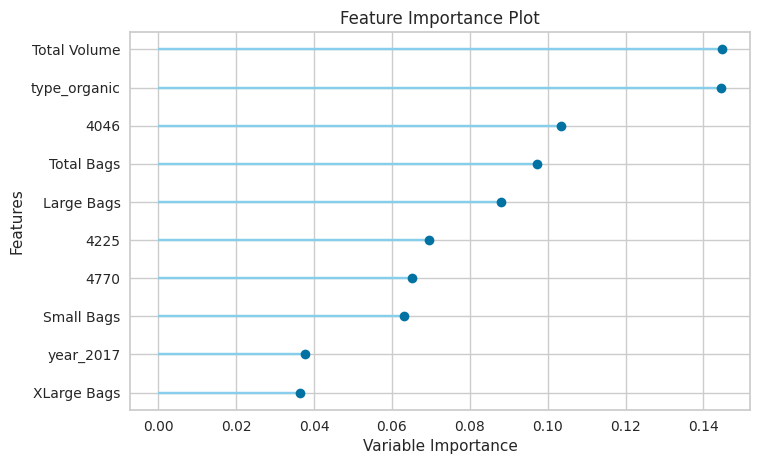

In [45]:
# --- Plot Feature Importance for Tuned RFR Model ---
plot_model(tune_rf, plot = 'feature')

In [46]:
# --- Create Light GBM ---
lgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0989,0.0178,0.1334,0.8936,0.0533,0.0725
1,0.1015,0.0177,0.1332,0.8972,0.0542,0.0750
2,0.0977,0.0164,0.1282,0.8911,0.0530,0.0740
3,0.0953,0.0171,0.1308,0.8961,0.0521,0.0695
4,0.0954,0.0161,0.1271,0.9014,0.0506,0.0698
5,0.0978,0.0173,0.1315,0.8859,0.0532,0.0721
6,0.1014,0.0183,0.1354,0.8856,0.0548,0.0752
7,0.1037,0.0205,0.1431,0.8794,0.0568,0.0753
8,0.0999,0.0181,0.1344,0.8855,0.0548,0.0747


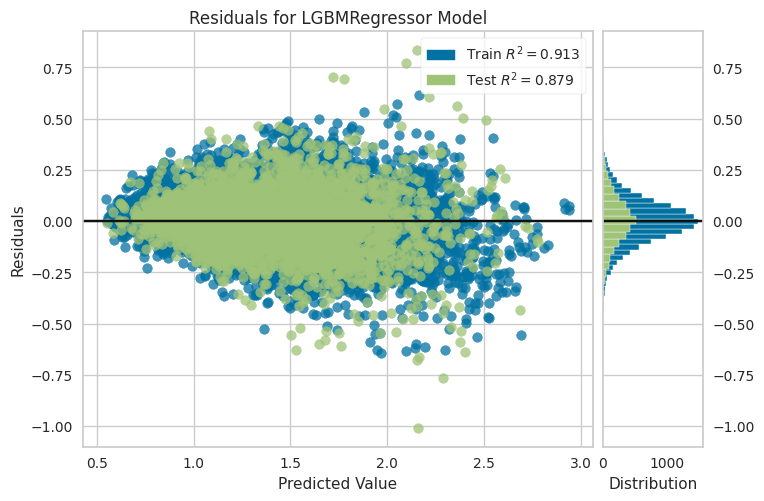

In [47]:
# --- Plot the Residual of Light GBM ---
plot_model(lgbm)

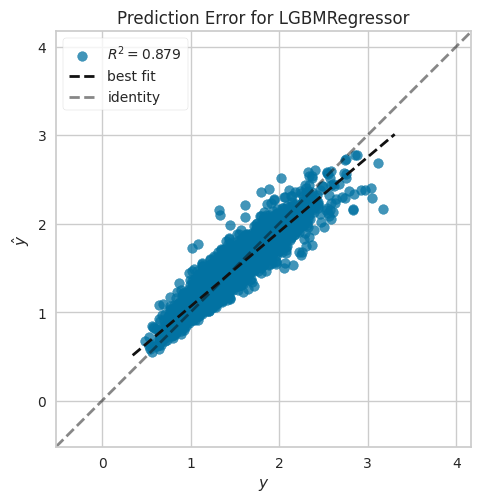

In [48]:
# --- Plot Error Prediction for Light GBM ---
plot_model(lgbm, plot = 'error')

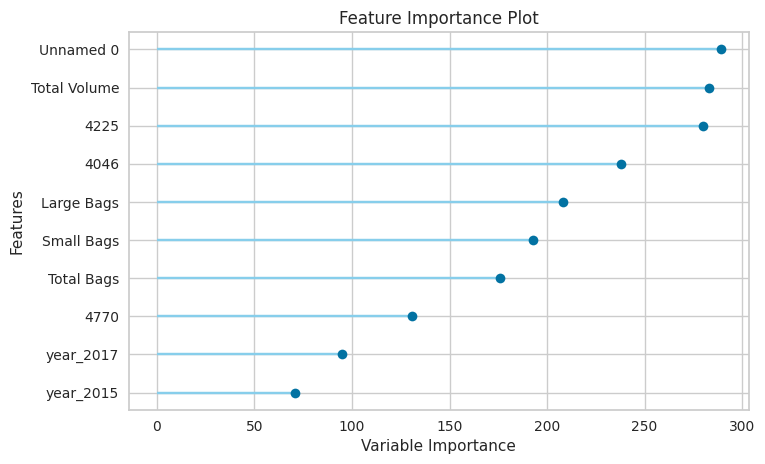

In [49]:
# --- Plot Feature Importance for Light GBM --
plot_model(lgbm, plot = 'feature')

In [50]:
# --- Tuning Light Gradient Boost ---
tune_lgbm = tune_model(lgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1194,0.0264,0.1626,0.8421,0.0644,0.0872
1,0.1309,0.0291,0.1706,0.8315,0.0693,0.0973
2,0.1242,0.0270,0.1645,0.8207,0.0689,0.0962
3,0.1184,0.0265,0.1629,0.8386,0.0650,0.0874
4,0.1205,0.0256,0.1600,0.8435,0.0644,0.0892
5,0.1234,0.0267,0.1635,0.8235,0.0667,0.0924
6,0.1244,0.0266,0.1630,0.8343,0.0673,0.0950
7,0.1298,0.0310,0.1762,0.8171,0.0708,0.0961
8,0.1298,0.0295,0.1717,0.8132,0.0704,0.0981


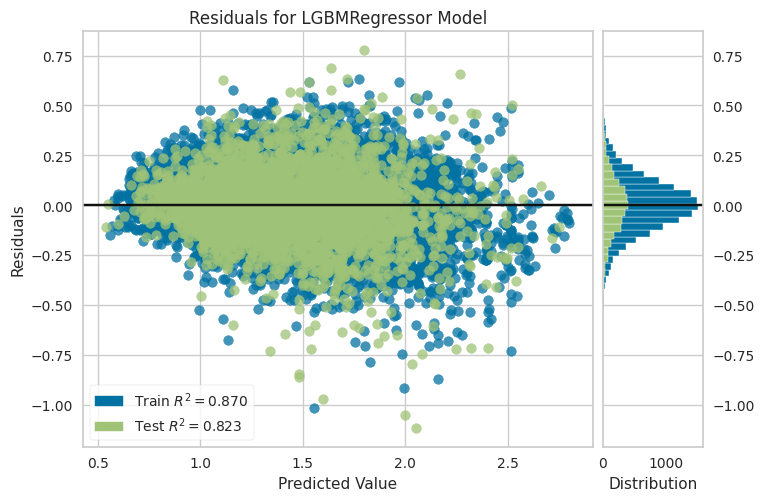

In [51]:
# --- Plot the Residual of Tuned Light Gradient Boost ---
plot_model(tune_lgbm)

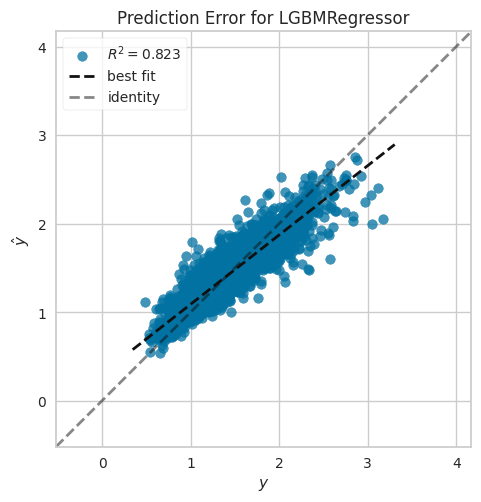

In [52]:
# --- Plot Error Prediction for Tuned Light Gradient Boost ---
plot_model(tune_lgbm, plot = 'error')

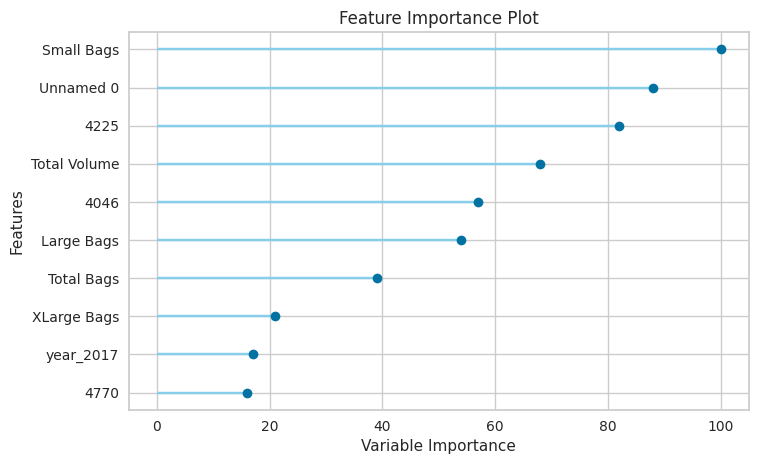

In [53]:
# --- Plot Feature Importance for Tuned Light Gradient Boost --
plot_model(tune_lgbm, plot = 'feature')

In [54]:
# --- Prediction using Best Model ---
predict_model(best_models)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0719,0.0122,0.1104,0.9247,0.0437,0.0529


,Unnamed 0,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type_organic,...,Date_month_3,Date_month_5,Date_month_6,Date_month_7,Date_month_8,Date_weekday_6,Date_is_month_end_1,Date_is_month_start_1,AveragePrice,Label
0,0.357143,1.770992,0.749676,1.618697,1.809093,4.169797,5.326726,1.068416,3.828886,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.82,0.8286
1,-0.464286,-0.237191,-0.079796,-0.196736,-0.030364,-0.292676,-0.219610,-0.123732,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.61,1.6229
2,0.321429,0.082122,-0.049090,0.292166,-0.030364,0.257952,0.032864,1.636757,0.000000,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.68,1.6202
3,0.035714,0.422099,0.783756,0.593626,2.410570,0.183641,0.400364,-0.098366,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.01,1.0042
4,0.285714,-0.237167,-0.079152,-0.188752,-0.030364,-0.304423,-0.301527,0.124106,0.000000,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.92,1.3729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,0.964286,9.355392,5.424141,14.544580,87.213806,6.352094,5.082823,6.684702,1021.323364,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.92,0.9354
3646,-0.357143,10.996881,15.420648,14.749743,43.922821,4.805529,6.212162,0.672725,40.000706,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.14,1.1015
3647,0.964286,-0.010962,0.158737,-0.155775,-0.030364,0.301584,0.534609,-0.020226,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.10,1.1046
3648,-0.107143,0.014786,0.053533,-0.007713,-0.030107,0.304855,0.539354,-0.021873,0.000000,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.21,1.2639


In [55]:
# --- Prediction using RFR Model ---
predict_model(rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.0850,0.0157,0.1253,0.9031,0.0496,0.0624


,Unnamed 0,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type_organic,...,Date_month_3,Date_month_5,Date_month_6,Date_month_7,Date_month_8,Date_weekday_6,Date_is_month_end_1,Date_is_month_start_1,AveragePrice,Label
0,0.357143,1.770992,0.749676,1.618697,1.809093,4.169797,5.326726,1.068416,3.828886,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.82,0.8501
1,-0.464286,-0.237191,-0.079796,-0.196736,-0.030364,-0.292676,-0.219610,-0.123732,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.61,1.6161
2,0.321429,0.082122,-0.049090,0.292166,-0.030364,0.257952,0.032864,1.636757,0.000000,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.68,1.5550
3,0.035714,0.422099,0.783756,0.593626,2.410570,0.183641,0.400364,-0.098366,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.01,1.0397
4,0.285714,-0.237167,-0.079152,-0.188752,-0.030364,-0.304423,-0.301527,0.124106,0.000000,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.92,1.2828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,0.964286,9.355392,5.424141,14.544580,87.213806,6.352094,5.082823,6.684702,1021.323364,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.92,0.9621
3646,-0.357143,10.996881,15.420648,14.749743,43.922821,4.805529,6.212162,0.672725,40.000706,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.14,1.0999
3647,0.964286,-0.010962,0.158737,-0.155775,-0.030364,0.301584,0.534609,-0.020226,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.10,1.1904
3648,-0.107143,0.014786,0.053533,-0.007713,-0.030107,0.304855,0.539354,-0.021873,0.000000,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.21,1.4778


In [56]:
# --- Prediction using Light Gradient Boosting Model ---
predict_model(lgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.1024,0.0197,0.1402,0.8786,0.0556,0.0747


,Unnamed 0,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type_organic,...,Date_month_3,Date_month_5,Date_month_6,Date_month_7,Date_month_8,Date_weekday_6,Date_is_month_end_1,Date_is_month_start_1,AveragePrice,Label
0,0.357143,1.770992,0.749676,1.618697,1.809093,4.169797,5.326726,1.068416,3.828886,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.82,0.879362
1,-0.464286,-0.237191,-0.079796,-0.196736,-0.030364,-0.292676,-0.219610,-0.123732,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.61,1.558793
2,0.321429,0.082122,-0.049090,0.292166,-0.030364,0.257952,0.032864,1.636757,0.000000,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.68,1.471604
3,0.035714,0.422099,0.783756,0.593626,2.410570,0.183641,0.400364,-0.098366,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.01,1.052708
4,0.285714,-0.237167,-0.079152,-0.188752,-0.030364,-0.304423,-0.301527,0.124106,0.000000,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.92,1.204581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,0.964286,9.355392,5.424141,14.544580,87.213806,6.352094,5.082823,6.684702,1021.323364,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.92,1.007494
3646,-0.357143,10.996881,15.420648,14.749743,43.922821,4.805529,6.212162,0.672725,40.000706,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.14,1.049828
3647,0.964286,-0.010962,0.158737,-0.155775,-0.030364,0.301584,0.534609,-0.020226,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.10,1.180087
3648,-0.107143,0.014786,0.053533,-0.007713,-0.030107,0.304855,0.539354,-0.021873,0.000000,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.21,1.393180


In [57]:
# --- Finalize Best Model ---
final_best = finalize_model(best_models)

# --- Final Best Model Parameters for Deployment ---
plot_model(best_models, plot='parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1


In [58]:
# --- Prediction using Final Model ---
predict_model(final_best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


,Unnamed 0,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type_organic,...,Date_month_3,Date_month_5,Date_month_6,Date_month_7,Date_month_8,Date_weekday_6,Date_is_month_end_1,Date_is_month_start_1,AveragePrice,Label
0,0.357143,1.770992,0.749676,1.618697,1.809093,4.169797,5.326726,1.068416,3.828886,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.82,0.82
1,-0.464286,-0.237191,-0.079796,-0.196736,-0.030364,-0.292676,-0.219610,-0.123732,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.61,1.61
2,0.321429,0.082122,-0.049090,0.292166,-0.030364,0.257952,0.032864,1.636757,0.000000,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.68,1.68
3,0.035714,0.422099,0.783756,0.593626,2.410570,0.183641,0.400364,-0.098366,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.01,1.01
4,0.285714,-0.237167,-0.079152,-0.188752,-0.030364,-0.304423,-0.301527,0.124106,0.000000,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.92,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,0.964286,9.355392,5.424141,14.544580,87.213806,6.352094,5.082823,6.684702,1021.323364,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.92,0.92
3646,-0.357143,10.996881,15.420648,14.749743,43.922821,4.805529,6.212162,0.672725,40.000706,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.14,1.14
3647,0.964286,-0.010962,0.158737,-0.155775,-0.030364,0.301584,0.534609,-0.020226,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.10,1.10
3648,-0.107143,0.014786,0.053533,-0.007713,-0.030107,0.304855,0.539354,-0.021873,0.000000,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.21,1.21


In [59]:
# --- Save Final Model into Pickle File ---
save_model(final_best,'Final_Best_Model_caesarmario_06May2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['type', 'year',
                                                             'region', 'month'],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='AveragePrice',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_v...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                       